# Perrin Freres champagne sales

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [3]:
df_champagne = pd.read_csv('../data/Perrin Freres monthly champagne sales millions.csv')
len(df_champagne), df_champagne.columns

(107,
 Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object'))

## Preprocessing of the dataset

In [4]:
df_champagne.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df_champagne.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
# rename column
df_champagne.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)
df_champagne.columns

In [7]:
# drop 105 indexed row
df_champagne.drop(105, axis=0, inplace=True)
df_champagne.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
# drop 106 indexed row
df_champagne.drop(106, axis=0, inplace=True)
df_champagne.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
# identify column types
df_champagne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [10]:
# convert Month column into datetime type
df_champagne['Month'] = pd.to_datetime(df_champagne['Month'])
df_champagne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [11]:
# check for null
df_champagne.isnull().sum()

Month    0
Sales    0
dtype: int64

In [12]:
# set month column as the index
df_champagne.set_index('Month', inplace=True)
df_champagne.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
df_champagne.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 1: Visualization

<Axes: xlabel='Month'>

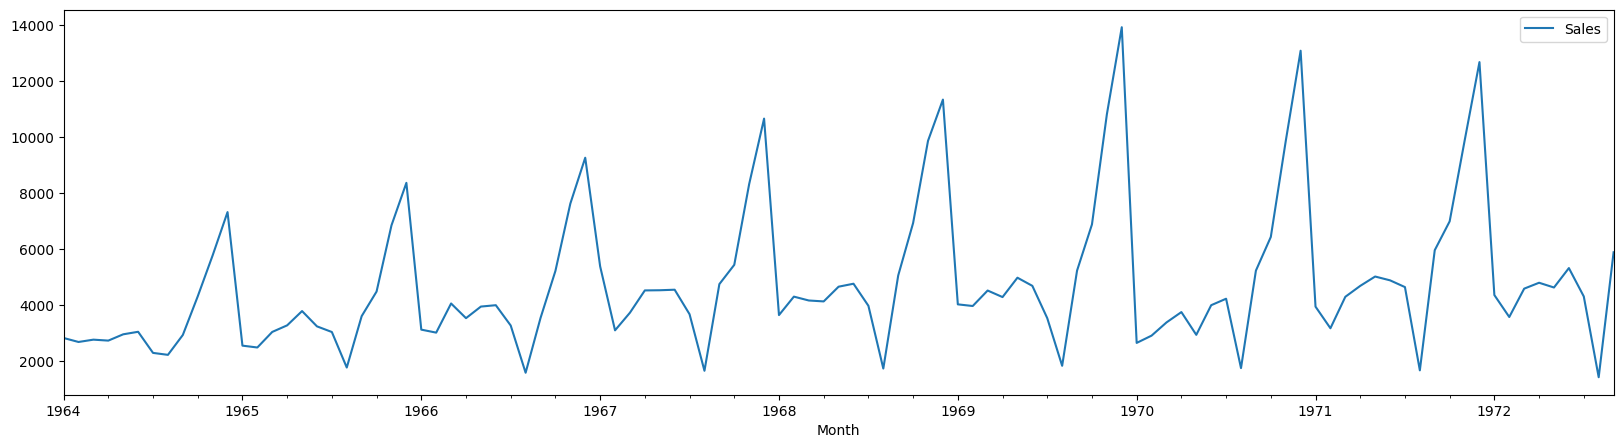

In [14]:
df_champagne.plot(figsize=(20, 5))

## Step 2: Test data for **Stationary**

In [15]:
from statsmodels.tsa.stattools import adfuller # type: ignore

To identify whether the data is stationary, We're going to do **Dickey Fuller Test**.
- H0: It is Non-Stationary
- H1: It is Stationary

In [16]:
# H0: It is Non-Stationary
# H1: It is Stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value,label in zip(result, labels):
        print(label +' : ' + str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(df_champagne['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Step 3: Differencing

In [18]:
df_champagne['Sales_First_Difference'] = df_champagne['Sales'] - df_champagne['Sales'].shift(1)

In [19]:
df_champagne['Sales_Seasonal_First_Difference'] = df_champagne['Sales'] - df_champagne['Sales'].shift(12)

In [21]:
df_champagne.head(20)

,Sales,Sales_First_Difference,Sales_Seasonal_First_Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [22]:
# again doing the dickey fuller test to confirm our differencing
adfuller_test(df_champagne['Sales_Seasonal_First_Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

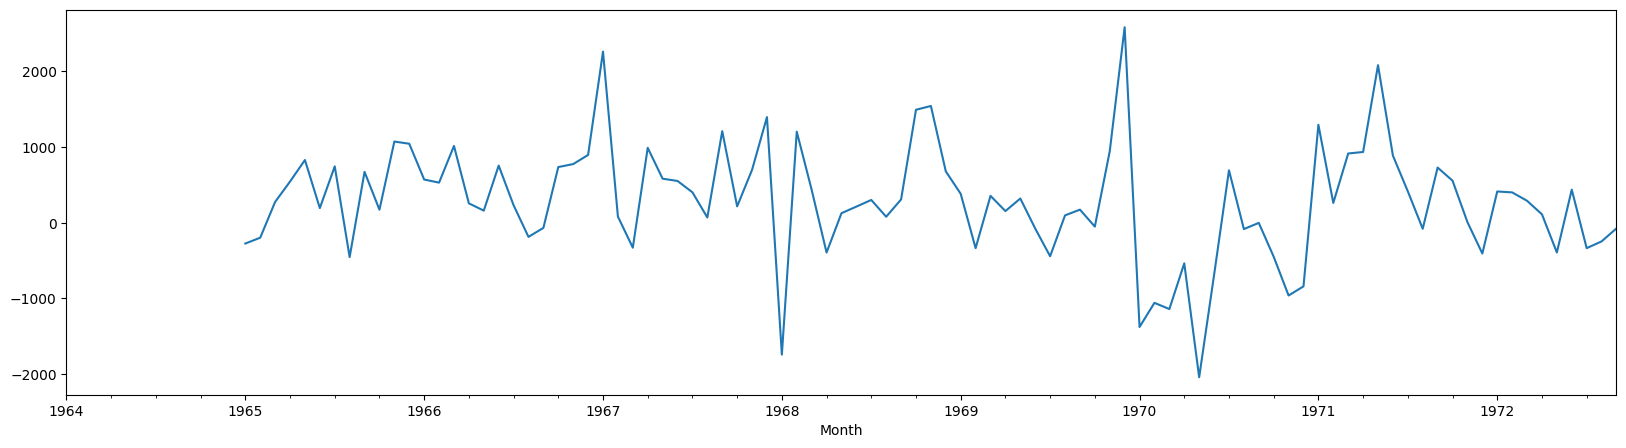

In [23]:
df_champagne['Sales_Seasonal_First_Difference'].plot(figsize=(20, 5))

## Step 4: Autocorrelation & Partial Autocorrelation 

In [40]:
import statsmodels.api as sm # type: ignore
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf # type: ignore

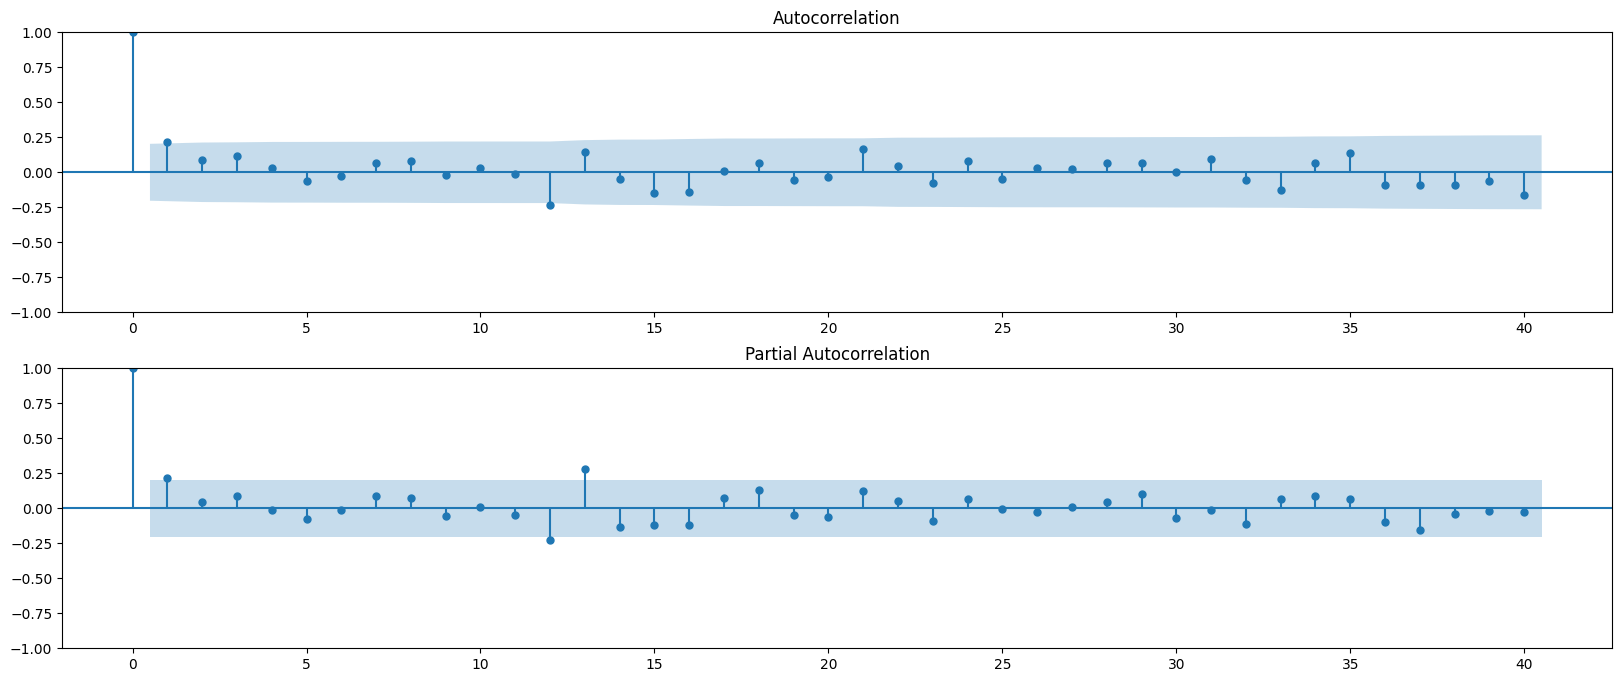

In [41]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_champagne['Sales_Seasonal_First_Difference'].dropna(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_champagne['Sales_Seasonal_First_Difference'].dropna(), lags=40, ax=ax2) 

## Modeling

### ARIMA

- For non-seasonal data
    - p = 1
    - d = 1
    - q = 0 or 1

In [35]:
from statsmodels.tsa.arima.model import ARIMA # type: ignore

In [36]:
# since this is a seasonal data ARIMA model won't work well
# model = ARIMA(<DATA>, order=(<p>, <d>, <q>))
model = ARIMA(df_champagne['Sales'], order=(1, 1, 1))
arima_model_fit = model.fit()

/mnt/d/vault/devhub/forcasting_perrin_freres_monthly_champagne_sales/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/forcasting_perrin_freres_monthly_champagne_sales/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/forcasting_perrin_freres_monthly_champagne_sales/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 31 Jul 2024   AIC                           1911.627
Time:                        20:14:45   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

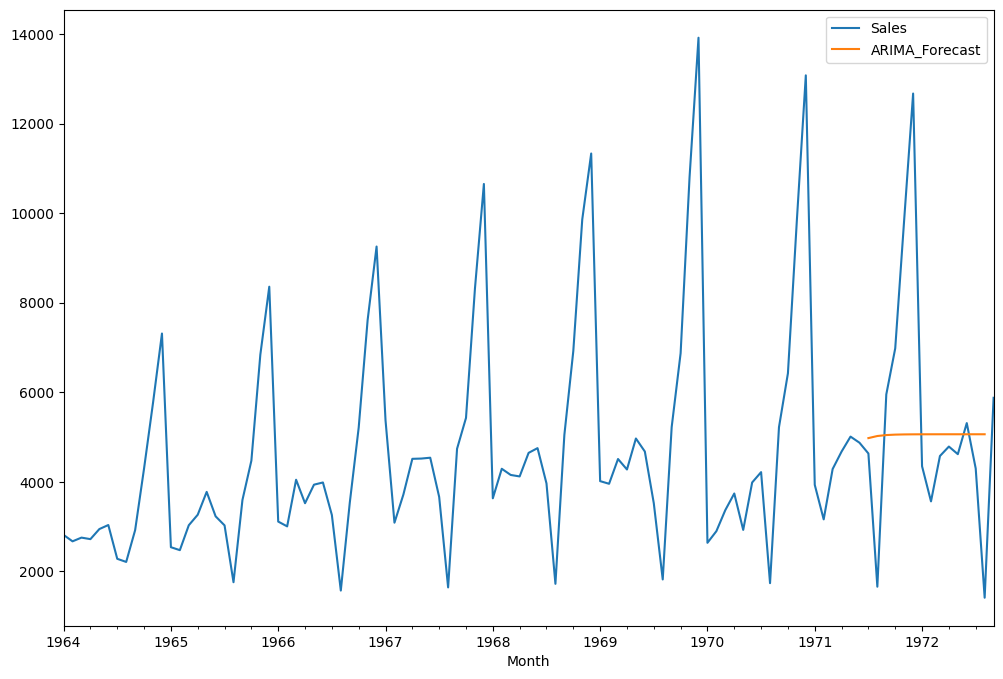

In [38]:
df_champagne['ARIMA_Forecast'] = arima_model_fit.predict(start=90, end=103, dynamic=True)
df_champagne[['Sales','ARIMA_Forecast']].plot(figsize=(12, 8))

### SARIMAX

In [39]:
import statsmodels.api as sm # type: ignore

In [42]:
model = sm.tsa.statespace.SARIMAX(df_champagne['Sales'], order= (1, 1, 1), seasonal_order = (1, 1, 1, 12))
sarimax_model_fit = model.fit()

/mnt/d/vault/devhub/forcasting_perrin_freres_monthly_champagne_sales/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/forcasting_perrin_freres_monthly_champagne_sales/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99458D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05906D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18421D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06184D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.69145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<Axes: xlabel='Month'>

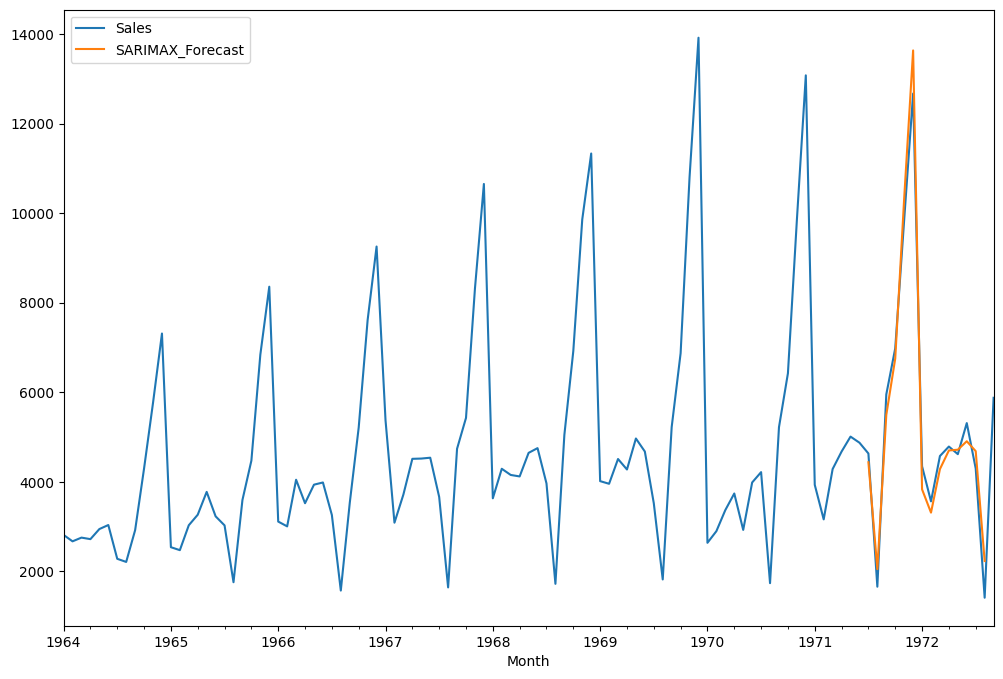

In [43]:
df_champagne['SARIMAX_Forecast'] = sarimax_model_fit.predict(start=90,end=103,dynamic=True)
df_champagne[['Sales','SARIMAX_Forecast']].plot(figsize=(12,8))

## Prediction

### Do prediction on synthesis data

In [44]:
from pandas.tseries.offsets import DateOffset

In [45]:
future_dates = [df_champagne.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [46]:
future_datest_df = pd.DataFrame(index=future_dates[1:] ,columns=df_champagne.columns)
future_datest_df.tail()

,Sales,Sales_First_Difference,Sales_Seasonal_First_Difference,ARIMA_Forecast,SARIMAX_Forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [47]:
future_df = pd.concat([df_champagne, future_datest_df])

/tmp/ipykernel_33316/2634283556.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df_champagne, future_datest_df])


<Axes: >

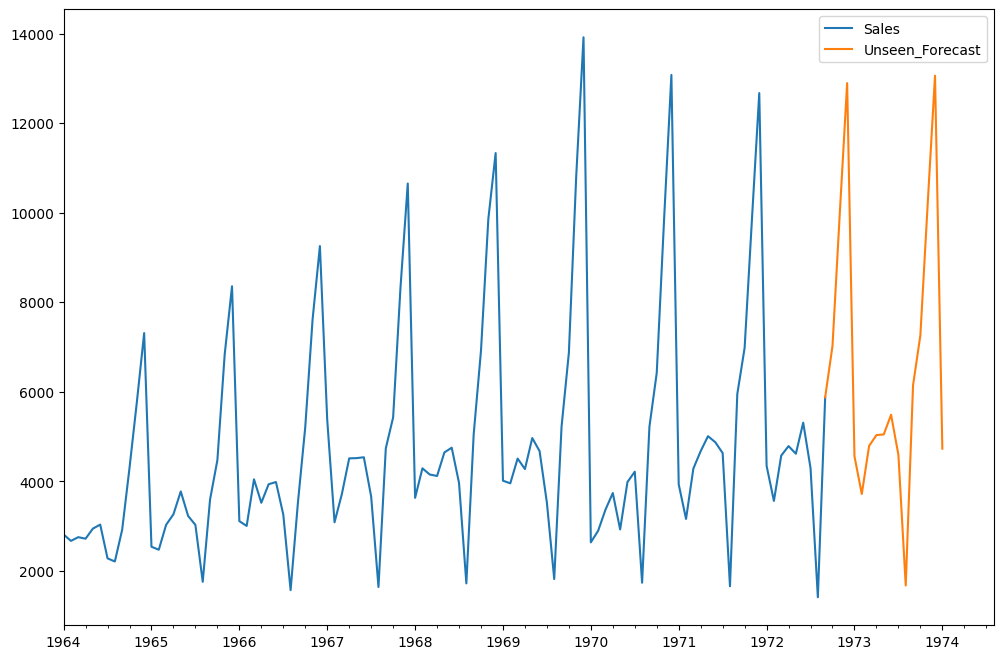

In [48]:
future_df['Unseen_Forecast'] = sarimax_model_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'Unseen_Forecast']].plot(figsize=(12, 8))